# 한글 워드 클라우드 - 여친선물

#### KoNLPy 설치
- ['konlpy 오류시 참고'](https://m.blog.naver.com/kiddwannabe/221795961189)로 검색

In [1]:
import konlpy
konlpy.__version__

'0.5.2'

In [2]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

---
#### 여친 선물 - 워드 클라우드 만들기

In [4]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [5]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [ ]:
# 한글 이외의 글자는 제거

In [6]:
import re
# re.sub('패턴', 변경할 내용, '바꿀 대상 문자열', 바꿀횟수)
# [ㄱ-ㅎㅏ-ㅣ가-힣], [abcABC], [A-Za_z]

In [9]:
new_tokens = []
for token in tokens: 
    new_token = re.sub('[^가-힣 ]', '', token) # 한글과 스페이스를 제외한 것을 제거
    if new_token:           # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Pretendard-sb'

>엉터리 단어 제거 - 수동으로 처리

In [12]:
import nltk

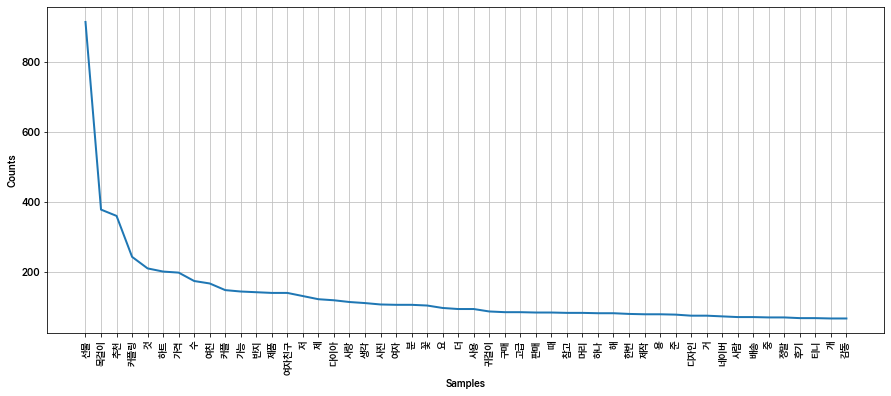

In [13]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [31]:
# stop_list = ['선물', '추천']
# stop_words = '선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 저 제 사랑 생각 여자 분 요 더 사용 구매 판매 때 참고 머리 하나'
# stop_list = stop_words.split()
stop_list = ['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '남녀', '커플룩', '버핏', '빅사', '이즈', '하프', '니트', '가디건', '남녀', '공용', '체크', '라인', '버핏', '가디건', '커플룩', '로파', '웨어', '버핏', '가디건', '남자', '봄', '가을', '겨울', '루즈', '핏', '니트', '남녀', '공용', '버핏', '스냅', '가디건', '남녀', '공용', '버핏', '패턴', '니트', '가디건', '컬러', '인기', '신상', '남여', '가을', '겨울', '버핏', '넥', '니트', '가디건', '가디건', '남녀', '공용', '버핏', '체크', '브이넥', '버튼', '가디건', '컬러', '남여', '공용', '아우', '터', '루즈', '핏', '이드', '카라', '커플룩', '가디건', '레인보우', '영문', '레터', '링', '포인트', '블랙', '볼캡', '모자', '야구모', '브랜드', '모자', '쇼핑', '도움', '채택', '파트너', '스', '커미션', '지급', '샵', '수호', '돼지', '디', '퓨저', '핸드', '메이드', '샵']

In [32]:
# new_token_list = []
# for token in new_tokens:
#     if token not in stop_list:
#         new_token_list.append(token)
# new_tokens = new_token_list

In [33]:
new_tokens = [token for token in new_tokens if token not in stop_list]

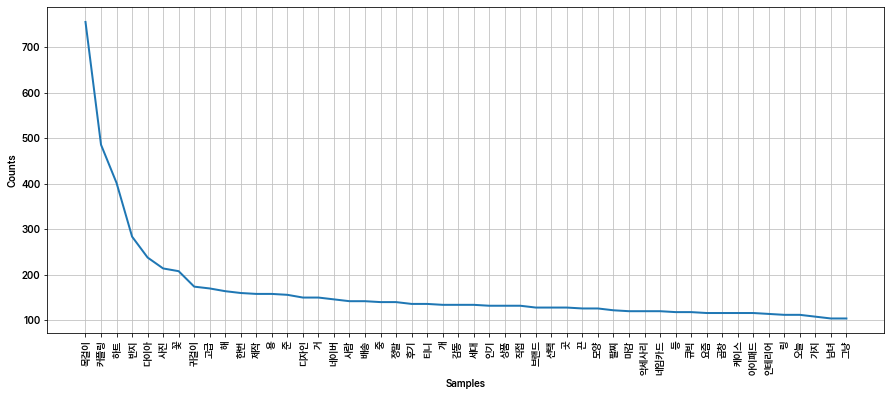

In [34]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [35]:
print(new_tokens[:100])

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '남녀', '커플룩', '버핏', '빅사', '이즈', '하프', '니트', '가디건', '남녀', '공용', '체크', '라인', '버핏', '가디건', '커플룩', '로파', '웨어', '버핏', '가디건', '남자', '봄', '가을', '겨울', '루즈', '핏', '니트', '남녀', '공용', '버핏', '스냅', '가디건', '남녀', '공용', '버핏', '패턴', '니트', '가디건', '컬러', '인기', '신상', '남여', '가을', '겨울', '버핏', '넥', '니트', '가디건', '가디건', '남녀', '공용', '버핏', '체크', '브이넥', '버튼', '가디건', '컬러', '남여', '공용', '아우', '터', '루즈', '핏', '이드', '카라', '커플룩', '가디건', '레인보우', '영문', '레터', '링', '포인트', '블랙', '볼캡', '모자', '야구모', '브랜드', '모자', '쇼핑', '도움', '채택', '파트너', '스', '커미션', '지급', '샵', '수호', '돼지', '디', '퓨저', '핸드', '메이드', '샵']


- 워드 클라우드 그리기

In [58]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [60]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 756),
 ('커플링', 486),
 ('하트', 402),
 ('반지', 284),
 ('다이아', 238),
 ('사진', 214),
 ('꽃', 208),
 ('귀걸이', 174),
 ('고급', 170),
 ('해', 164)]

In [62]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
). generate_from_frequencies(dict(data))

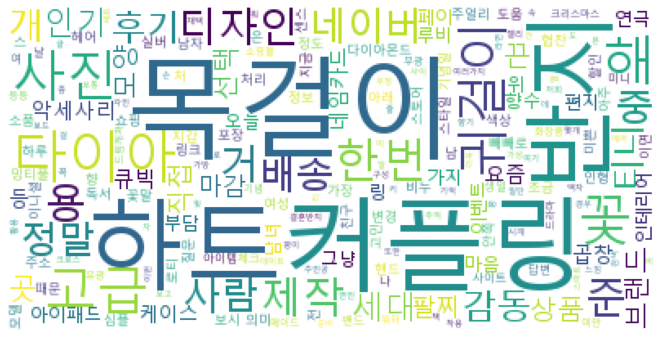

In [63]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [65]:
# 하트 그림에 표시하기
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [70]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask = mask,
    background_color='white',
    min_font_size=1, max_font_size=100
). generate_from_frequencies(dict(data))
default_colors = wc.to_array()

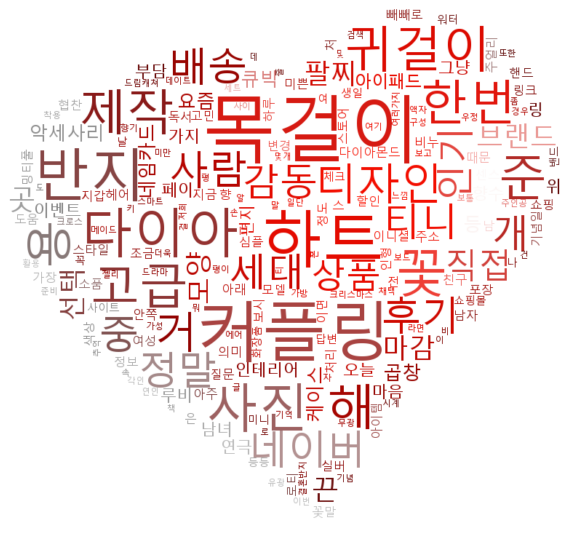

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()